In [62]:
import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns



In [63]:
df=pd.read_csv('diabetes.csv')

In [64]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [65]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

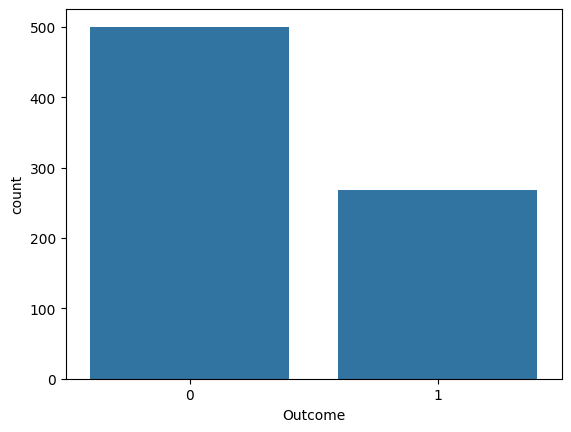

In [66]:
sns.countplot(data=df,x='Outcome')

In [67]:
one=df[df['Outcome']==1]
zero=df[df['Outcome']==0]

In [68]:
from sklearn.utils import resample
one_resample=resample(one,replace=True,n_samples=int(0.8*(len(zero))),random_state=42)

In [69]:
one_resample.shape

(400, 9)

In [70]:
new_df=pd.concat([zero,one_resample])

In [71]:
new_df=new_df.sample(frac=1)

In [72]:
from sklearn.model_selection import train_test_split
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [73]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [75]:
k_values=[5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61]
accuracy=[]

In [76]:
for i in range(len(k_values)):
    model=KNeighborsClassifier(n_neighbors=k_values[i])
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc=metrics.accuracy_score(y_test,y_pred)
    accuracy.append(acc)

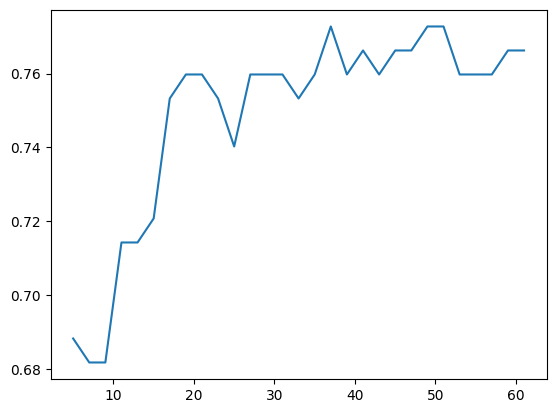

In [77]:
import matplotlib.pyplot as plt
plt.plot(k_values,accuracy)

In [78]:
optimal_k=0
optimal_acc=0
for i in list(zip(k_values,accuracy)):
    if(i[1]>optimal_acc):
        optimal_k=i[0]
        optimal_acc=i[1]
print(optimal_k)
    

37


In [79]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=optimal_k)

In [80]:
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=37)

In [81]:
y_pred=model.predict(x_test)

In [82]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84        99
           1       0.78      0.51      0.62        55

    accuracy                           0.77       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.77      0.77      0.76       154



(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

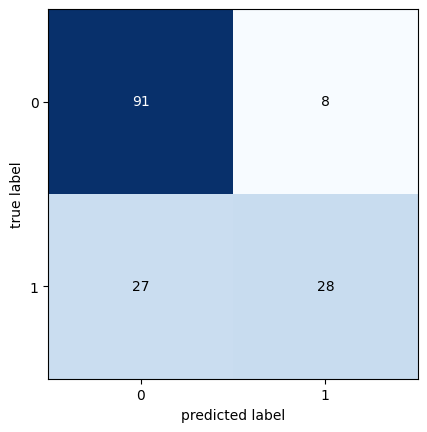

In [87]:
from mlxtend.plotting import plot_confusion_matrix
cm=metrics.confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm)


In [90]:
error_rate = 1- metrics.accuracy_score(y_test,y_pred)
error_rate

0.2272727272727273